In [1]:
# data_source= https://data.police.uk/data/fetch/a26c38e0-ddb3-4a06-8e3c-18a45f9d8852/

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import os, re

#from IPython.display import IFrame
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
path_to_data = './West_Midlands_Crimes'
current_dir = os.path.dirname(os.path.abspath(path_to_data))

i = 0
df_list = []

for root, dirs, files in os.walk(current_dir):
    for file_name in files:
        if re.match("^.*.csv$", file_name):
            mini_df = pd.read_csv(os.path.join(root, file_name))
            mini_df['key'] = "file{}".format(i)
            df_list.append(mini_df)
            i += 1
            
dataset = pd.concat(df_list)

In [3]:
dataset.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key
0,a6a1adc1d890114c30dac76d36d5f51c045bbb0f7bce28...,2020-07,West Midlands Police,West Midlands Police,-0.203289,51.604106,On or near Dollis Road,E01000257,Barnet 017B,Violence and sexual offences,Unable to prosecute suspect,NaN,file0
1,e2af60423c5323fe46d00b434f21f8a3ebe6a5f1fd4d61...,2020-07,West Midlands Police,West Midlands Police,-0.203289,51.604106,On or near Dollis Road,E01000257,Barnet 017B,Violence and sexual offences,Unable to prosecute suspect,NaN,file0
2,6eb13502ea880275aee6abdb1f5273ba758814bc973daf...,2020-07,West Midlands Police,West Midlands Police,-0.200779,51.580633,On or near Temple Gardens,E01000216,Barnet 035E,Public order,Investigation complete; no suspect identified,NaN,file0
3,95c0f9892d3f74f8c263e92b043ad23b3eab9adbccc664...,2020-07,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham 001A,Other theft,Investigation complete; no suspect identified,NaN,file0
4,NaN,2020-07,West Midlands Police,West Midlands Police,-1.843740,52.594588,On or near Clarence Road,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN,file0


In [4]:
print(dataset.shape)

(393686, 13)


In [5]:
new_csv = 'West_Midlands_Crimes.csv'
dataset.to_csv(new_csv, index=False)

In [6]:
data = pd.read_csv(new_csv)

In [7]:
data.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key
0,a6a1adc1d890114c30dac76d36d5f51c045bbb0f7bce28...,2020-07,West Midlands Police,West Midlands Police,-0.203289,51.604106,On or near Dollis Road,E01000257,Barnet 017B,Violence and sexual offences,Unable to prosecute suspect,NaN,file0
1,e2af60423c5323fe46d00b434f21f8a3ebe6a5f1fd4d61...,2020-07,West Midlands Police,West Midlands Police,-0.203289,51.604106,On or near Dollis Road,E01000257,Barnet 017B,Violence and sexual offences,Unable to prosecute suspect,NaN,file0
2,6eb13502ea880275aee6abdb1f5273ba758814bc973daf...,2020-07,West Midlands Police,West Midlands Police,-0.200779,51.580633,On or near Temple Gardens,E01000216,Barnet 035E,Public order,Investigation complete; no suspect identified,NaN,file0
3,95c0f9892d3f74f8c263e92b043ad23b3eab9adbccc664...,2020-07,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham 001A,Other theft,Investigation complete; no suspect identified,NaN,file0
4,NaN,2020-07,West Midlands Police,West Midlands Police,-1.843740,52.594588,On or near Clarence Road,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN,file0


In [8]:
data.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context', 'key'],
      dtype='object')

In [9]:
data.drop(['Crime ID', 'Location', 'Last outcome category', 'Context', 'key'], axis=1, inplace=True)
data.head()

,Month,Reported by,Falls within,Longitude,Latitude,LSOA code,LSOA name,Crime type
0,2020-07,West Midlands Police,West Midlands Police,-0.203289,51.604106,E01000257,Barnet 017B,Violence and sexual offences
1,2020-07,West Midlands Police,West Midlands Police,-0.203289,51.604106,E01000257,Barnet 017B,Violence and sexual offences
2,2020-07,West Midlands Police,West Midlands Police,-0.200779,51.580633,E01000216,Barnet 035E,Public order
3,2020-07,West Midlands Police,West Midlands Police,-1.850056,52.591108,E01009417,Birmingham 001A,Other theft
4,2020-07,West Midlands Police,West Midlands Police,-1.843740,52.594588,E01009418,Birmingham 001B,Anti-social behaviour


In [10]:
data.isna().sum()

Month           0
Reported by     0
Falls within    0
Longitude       0
Latitude        0
LSOA code       7
LSOA name       7
Crime type      0
dtype: int64

In [11]:
data.shape

(393686, 8)

In [12]:
data.dropna(subset='LSOA name', inplace=True)
data.isna().sum()

Month           0
Reported by     0
Falls within    0
Longitude       0
Latitude        0
LSOA code       0
LSOA name       0
Crime type      0
dtype: int64

In [13]:
data['Town'] = data['LSOA name'].str.split(' ').str[0]

In [14]:
data.drop('LSOA name', axis=1, inplace=True)
data.head()

,Month,Reported by,Falls within,Longitude,Latitude,LSOA code,Crime type,Town
0,2020-07,West Midlands Police,West Midlands Police,-0.203289,51.604106,E01000257,Violence and sexual offences,Barnet
1,2020-07,West Midlands Police,West Midlands Police,-0.203289,51.604106,E01000257,Violence and sexual offences,Barnet
2,2020-07,West Midlands Police,West Midlands Police,-0.200779,51.580633,E01000216,Public order,Barnet
3,2020-07,West Midlands Police,West Midlands Police,-1.850056,52.591108,E01009417,Other theft,Birmingham
4,2020-07,West Midlands Police,West Midlands Police,-1.843740,52.594588,E01009418,Anti-social behaviour,Birmingham


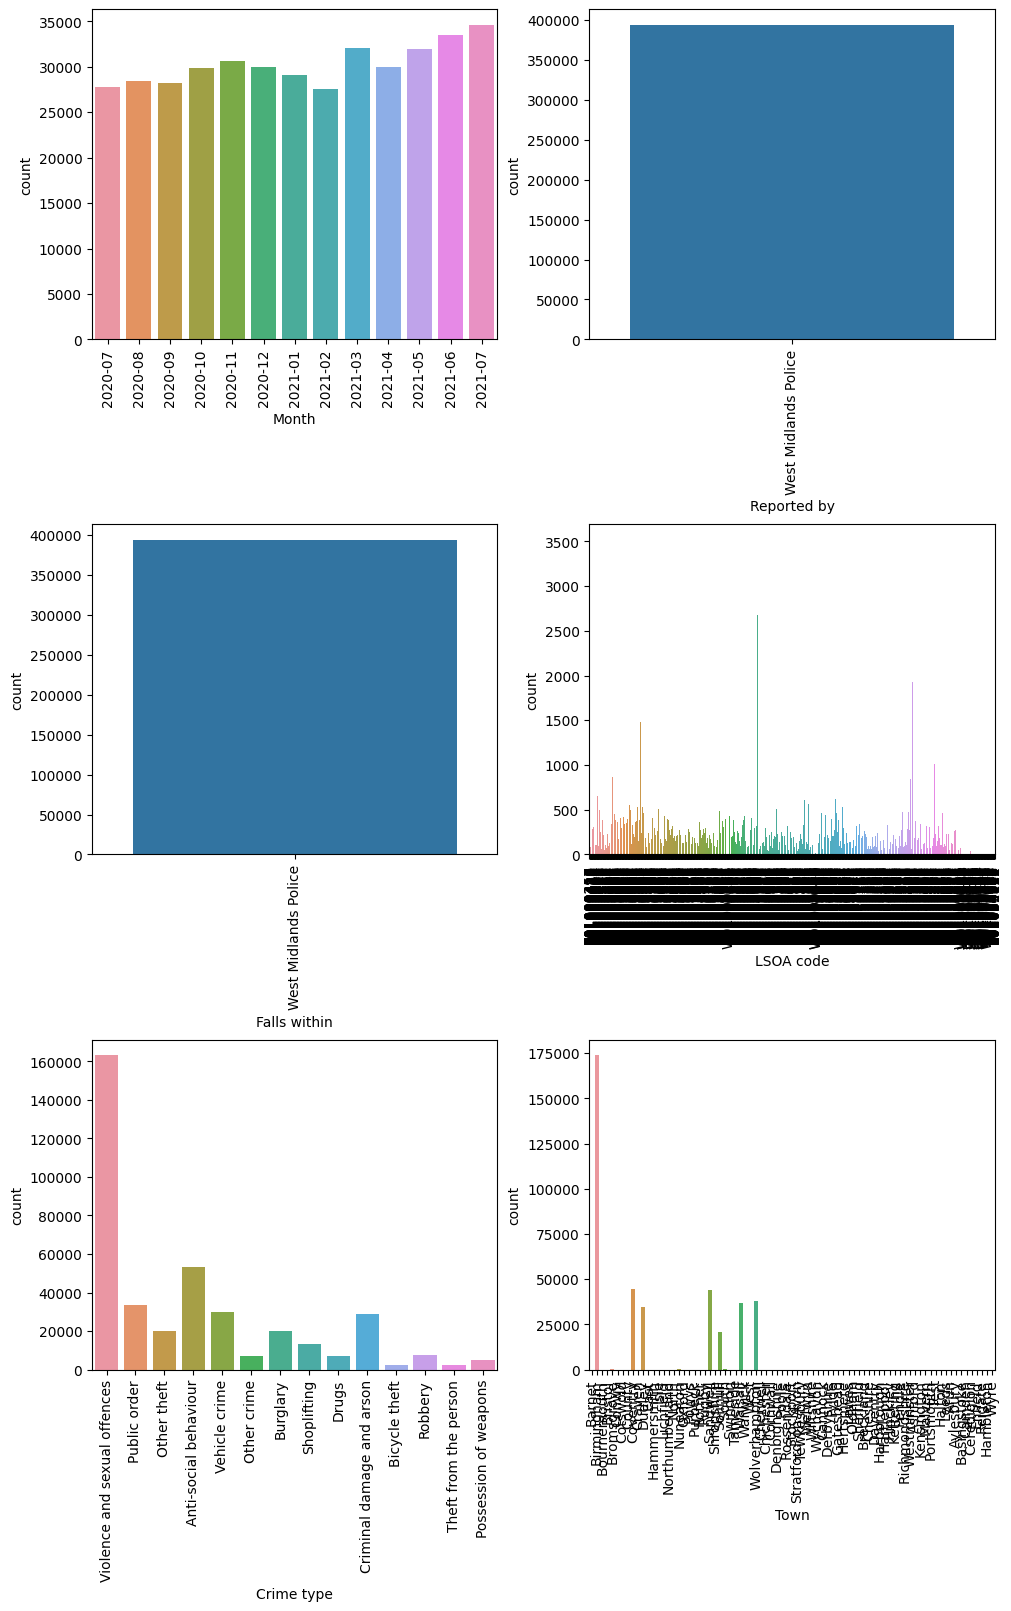

In [15]:
plot_columns= ['Month', 'Reported by', 'Falls within', 'LSOA code', 'Crime type', 'Town']

plt.figure(figsize=(10, 16), layout='constrained')
for i, column in enumerate(plot_columns):
    plt.subplot(3, 2, 1+i)
    sns.countplot(data=data, x=column)
    plt.xticks(rotation=90)
    
plt.show()

In [16]:
data.drop(['Reported by', 'Falls within'], axis=1, inplace=True)
data.head()

,Month,Longitude,Latitude,LSOA code,Crime type,Town
0,2020-07,-0.203289,51.604106,E01000257,Violence and sexual offences,Barnet
1,2020-07,-0.203289,51.604106,E01000257,Violence and sexual offences,Barnet
2,2020-07,-0.200779,51.580633,E01000216,Public order,Barnet
3,2020-07,-1.850056,52.591108,E01009417,Other theft,Birmingham
4,2020-07,-1.843740,52.594588,E01009418,Anti-social behaviour,Birmingham


In [17]:
data['Town'].value_counts(ascending=False)

Birmingham       173821
Coventry          44809
Sandwell          44248
Wolverhampton     37924
Walsall           36811
                  ...  
Cannock               1
Cornwall              1
Chichester            1
Cherwell              1
Wyre                  1
Name: Town, Length: 79, dtype: int64

In [18]:
town = ['Coventry']
Coventry_data = data[data.Town.str.contains('|'.join(town), na=False)]
Coventry_data.head()

,Month,Longitude,Latitude,LSOA code,Crime type,Town
11997,2020-07,-1.496370,52.448262,E01009589,Anti-social behaviour,Coventry
11998,2020-07,-1.490266,52.456957,E01009589,Anti-social behaviour,Coventry
11999,2020-07,-1.489929,52.455580,E01009589,Criminal damage and arson,Coventry
12000,2020-07,-1.502099,52.447792,E01009589,Drugs,Coventry
12001,2020-07,-1.492819,52.452553,E01009589,Other theft,Coventry


In [19]:
order= pd.DataFrame(Coventry_data['Crime type'].value_counts(ascending=False))

In [20]:
print(order)

                              Crime type
Violence and sexual offences       17917
Anti-social behaviour               6503
Vehicle crime                       3696
Criminal damage and arson           3571
Public order                        3508
Other theft                         2304
Burglary                            1914
Shoplifting                         1496
Drugs                                991
Other crime                          837
Robbery                              812
Possession of weapons                505
Bicycle theft                        452
Theft from the person                303


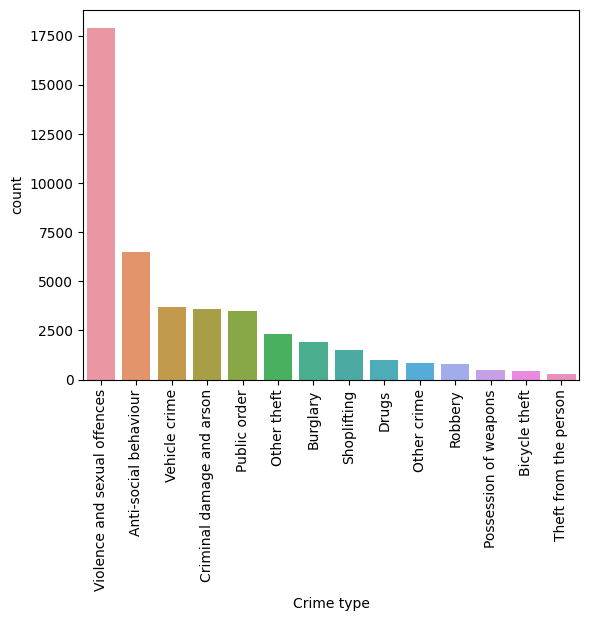

In [21]:
sns.countplot(data= Coventry_data, x= 'Crime type', order= order.index)
plt.xticks(rotation=90)
plt.show()

In [22]:
Coventry_data['LSOA code'].value_counts()

E01009642    2680
E01009638     851
E01032531     635
E01009641     616
E01009635     606
             ... 
E01034743       3
E01034744       2
E01034740       1
E01034748       1
E01034742       1
Name: LSOA code, Length: 200, dtype: int64

In [23]:
needed_data = Coventry_data[['LSOA code','Crime type']]
needed_data.head()

,LSOA code,Crime type
11997,E01009589,Anti-social behaviour
11998,E01009589,Anti-social behaviour
11999,E01009589,Criminal damage and arson
12000,E01009589,Drugs
12001,E01009589,Other theft


In [24]:
needed_data = Coventry_data[['LSOA code','Crime type']]
needed_data = pd.get_dummies(needed_data, columns=['Crime type'])
needed_data.head()

,LSOA code,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
11997,E01009589,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11998,E01009589,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11999,E01009589,0,0,0,1,0,0,0,0,0,0,0,0,0,0
12000,E01009589,0,0,0,0,1,0,0,0,0,0,0,0,0,0
12001,E01009589,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [25]:
clustering_data = needed_data.groupby(['LSOA code']).agg({'Crime type_Anti-social behaviour':'sum',
'Crime type_Bicycle theft':'sum',
'Crime type_Burglary':'sum',
'Crime type_Criminal damage and arson':'sum',
'Crime type_Drugs':'sum',
'Crime type_Other crime':'sum',
'Crime type_Other theft':'sum',
'Crime type_Possession of weapons':'sum',
'Crime type_Public order':'sum',
'Crime type_Robbery':'sum',
'Crime type_Shoplifting':'sum',
'Crime type_Theft from the person':'sum',
'Crime type_Vehicle crime':'sum',
'Crime type_Violence and sexual offences':'sum'}).reset_index()

In [26]:
clustering_data.head()

,LSOA code,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,E01009522,22,0,2,16,2,1,3,1,3,1,1,1,21,72
1,E01009523,7,0,8,11,2,0,12,0,8,2,0,1,28,33
2,E01009524,26,2,9,15,1,6,19,0,12,5,11,0,28,75
3,E01009525,10,1,8,5,2,2,5,1,4,0,0,0,19,53
4,E01009526,22,2,7,9,0,1,3,3,12,6,0,1,13,73


In [27]:
clustering_data_original = clustering_data.copy()
clustering_data_original.head()

,LSOA code,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,E01009522,22,0,2,16,2,1,3,1,3,1,1,1,21,72
1,E01009523,7,0,8,11,2,0,12,0,8,2,0,1,28,33
2,E01009524,26,2,9,15,1,6,19,0,12,5,11,0,28,75
3,E01009525,10,1,8,5,2,2,5,1,4,0,0,0,19,53
4,E01009526,22,2,7,9,0,1,3,3,12,6,0,1,13,73


In [28]:
clustering_data.drop(['LSOA code'], axis = 1, inplace = True, errors = 'ignore')
clustering_data.head()

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,22,0,2,16,2,1,3,1,3,1,1,1,21,72
1,7,0,8,11,2,0,12,0,8,2,0,1,28,33
2,26,2,9,15,1,6,19,0,12,5,11,0,28,75
3,10,1,8,5,2,2,5,1,4,0,0,0,19,53
4,22,2,7,9,0,1,3,3,12,6,0,1,13,73


In [29]:
clustering_data.var()

Crime type_Anti-social behaviour           1197.507312
Crime type_Bicycle theft                    147.499899
Crime type_Burglary                         106.457387
Crime type_Criminal damage and arson        229.380879
Crime type_Drugs                             70.013040
Crime type_Other crime                       15.900276
Crime type_Other theft                      258.291055
Crime type_Possession of weapons             18.793342
Crime type_Public order                     429.013467
Crime type_Robbery                           41.162211
Crime type_Shoplifting                      911.738291
Crime type_Theft from the person             40.130427
Crime type_Vehicle crime                    123.919196
Crime type_Violence and sexual offences    5666.053040
dtype: float64

In [30]:
from sklearn.preprocessing import normalize

In [31]:
normalized_data = normalize(clustering_data)
normalized_data = pd.DataFrame(normalized_data, columns=clustering_data.columns)
normalized_data.head()

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,0.275086,0.000000,0.025008,0.200063,0.025008,0.012504,0.037512,0.012504,0.037512,0.012504,0.012504,0.012504,0.262582,0.900281
1,0.145204,0.000000,0.165948,0.228178,0.041487,0.000000,0.248922,0.000000,0.165948,0.041487,0.000000,0.020743,0.580818,0.684535
2,0.289193,0.022246,0.100105,0.166842,0.011123,0.066737,0.211333,0.000000,0.133473,0.055614,0.122351,0.000000,0.311438,0.834209
3,0.171247,0.017125,0.136998,0.085623,0.034249,0.034249,0.085623,0.017125,0.068499,0.000000,0.000000,0.000000,0.325369,0.907609
4,0.276823,0.025166,0.088080,0.113246,0.000000,0.012583,0.037749,0.037749,0.150994,0.075497,0.000000,0.012583,0.163577,0.918548


In [32]:
normalized_data.var()

Crime type_Anti-social behaviour           0.013794
Crime type_Bicycle theft                   0.000759
Crime type_Burglary                        0.004043
Crime type_Criminal damage and arson       0.009292
Crime type_Drugs                           0.001059
Crime type_Other crime                     0.005507
Crime type_Other theft                     0.009762
Crime type_Possession of weapons           0.001304
Crime type_Public order                    0.006863
Crime type_Robbery                         0.000669
Crime type_Shoplifting                     0.012306
Crime type_Theft from the person           0.000180
Crime type_Vehicle crime                   0.021655
Crime type_Violence and sexual offences    0.018640
dtype: float64

## Agglomerative Clustering

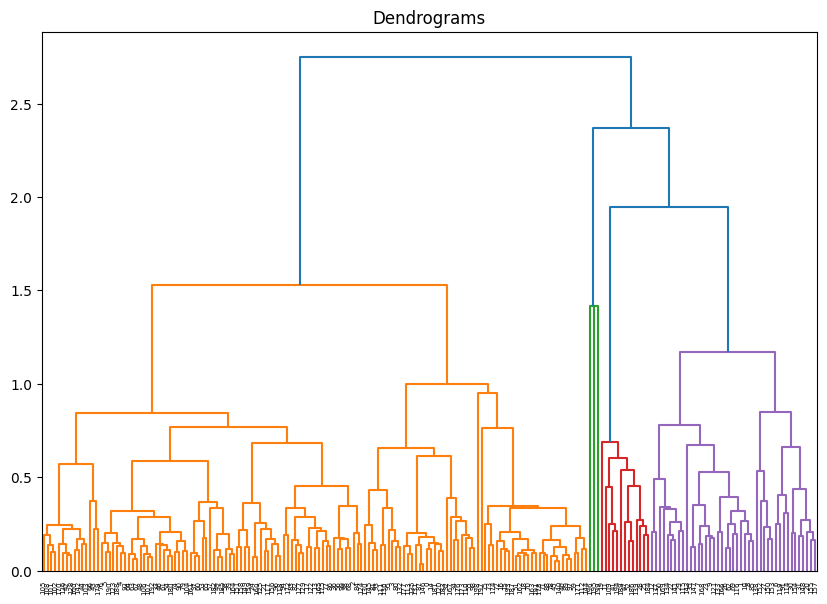

In [33]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
plt.xticks(rotation=90)
dend = shc.dendrogram(shc.linkage(normalized_data, method='ward'))

In [34]:
scores= {}

for i in [3, 4, 5, 6, 7]:
    model = AgglomerativeClustering(n_clusters= i, affinity='euclidean', linkage='ward')
    y = model.fit_predict(normalized_data)
    score= silhouette_score(normalized_data, y, metric= 'euclidean')
    scores[i]= score
    
scores

{3: 0.30485856886685275,
 4: 0.3172371002871227,
 5: 0.16034114857801754,
 6: 0.16074406230790347,
 7: 0.16133561780320438}

## K-means

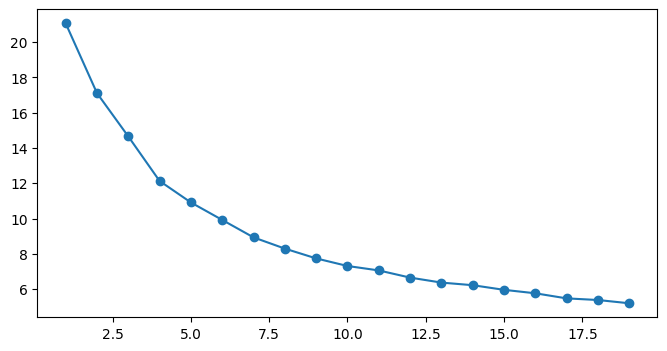

In [35]:
cluster_range = range(1, 20)
cluster_errors = []

for i in cluster_range:
    km = KMeans(n_clusters= i, random_state = 17)
    km.fit(normalized_data)
    cluster_errors.append(km.inertia_)

km_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})

plt.figure(figsize=(8,4))
plt.plot(km_df.num_clusters, km_df.cluster_errors, marker = "o")

In [36]:
dict= {}

for k in [3, 4, 5]:
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 17)
    y = kmeans.fit_predict(normalized_data)
    score= silhouette_score(normalized_data, y, metric= 'euclidean')
    dict[k]= score
    
dict

{3: 0.29644731722776124, 4: 0.3165232454439386, 5: 0.19339037561849248}

Agglomerative clustering with 4 clusters had the best performance based on silhouette score.

In [37]:
aggclust = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_aggclust = aggclust.fit_predict(normalized_data)

## Visualizing the clusters
First, dimensionality reduction with principal component analysis.

In [38]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data)
reduced_data[:5]

array([[-0.05893524, -0.09498472],
       [ 0.33888062, -0.2120519 ],
       [ 0.09377013, -0.01295673],
       [-0.01529432, -0.18083186],
       [-0.1399254 , -0.04444939]])

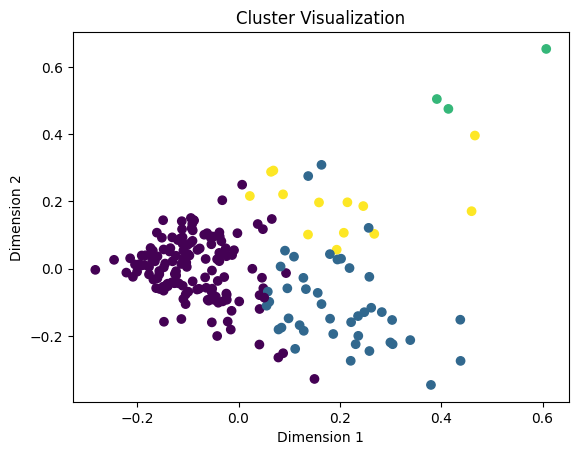

In [39]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y_aggclust, cmap='viridis')
plt.title('Cluster Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

## Drawing conclusions

In [40]:
clustering_data['cluster'] = y_aggclust
clustering_data.head()

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences,cluster
0,22,0,2,16,2,1,3,1,3,1,1,1,21,72,0
1,7,0,8,11,2,0,12,0,8,2,0,1,28,33,1
2,26,2,9,15,1,6,19,0,12,5,11,0,28,75,0
3,10,1,8,5,2,2,5,1,4,0,0,0,19,53,0
4,22,2,7,9,0,1,3,3,12,6,0,1,13,73,0


In [41]:
crimes_by_cluster = pd.DataFrame(round(clustering_data.groupby('cluster').mean(), 1))
crimes_by_cluster

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
cluster,,,,,,,,,,,,,,
0,35.1,1.4,9.7,20.3,5.6,4.9,10.9,2.9,18.9,4.5,3.4,1.2,17.5,104.0
1,16.7,1.2,6.8,9.0,1.6,1.7,8.4,0.5,8.6,1.5,2.1,0.4,19.5,36.6
2,0.0,0.0,0.0,0.3,0.0,0.3,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,64.5,15.3,19.7,25.0,10.0,5.0,30.7,5.9,36.9,8.3,71.1,8.6,30.4,129.5


In [42]:
crimes_by_cluster.sum(axis=1)

cluster
0    240.3
1    114.6
2      0.9
3    460.9
dtype: float64

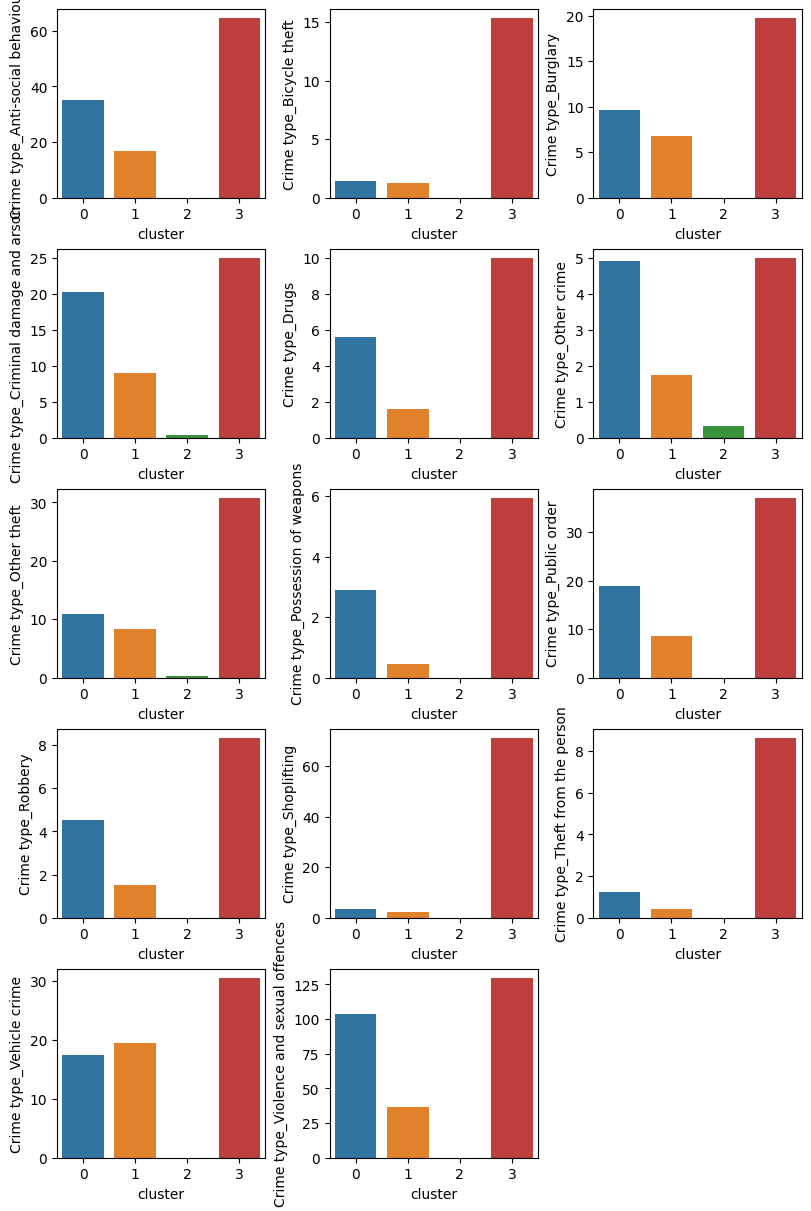

In [43]:
plt.figure(figsize=(8, 12), layout='constrained')

for i, column in enumerate(clustering_data.columns[:-1]):
    plt.subplot(5, 3, 1+i)
    sns.barplot(data= clustering_data, x= 'cluster', y= column, ci=None, estimator= 'mean')
    
plt.show()

Cluster 0: This is the cluster with the second-highest crime rates in all categories apart from vehicle crime (in which it is surpassed by Cluster 1).

Cluster 1: It has the second-lowest crime rates in all categories part from vehicle crime (in which it surpasses Cluster 0).

Cluster 2: Crime is almost non-existent in this cluster. Criminal damage, other theft, and other crime are the crime categories that had significant numbers of reports in this cluster, thought the rates are still the lowest of all the clusters'. LSOAs in this cluster appear to be the safest places to live in if crime rate is the metric.

Cluster 3: This cluster is characterized by the highest crime rates in all categories. LSOAs in this cluster need to be prioritized for crime control.

In [44]:
clustering_data_original['cluster'] = y_aggclust
LSOA_clusters = clustering_data_original[['LSOA code', 'cluster']]

In [45]:
LSOA_clusters.head()

,LSOA code,cluster
0,E01009522,0
1,E01009523,1
2,E01009524,0
3,E01009525,0
4,E01009526,0


In [46]:
LSOA_clusters.groupby('cluster').agg({'LSOA code':'count'})

,LSOA code
cluster,
0,141
1,43
2,3
3,13


In [47]:
clustered_full = pd.merge(Coventry_data, LSOA_clusters, on='LSOA code')
clustered_full.head()

,Month,Longitude,Latitude,LSOA code,Crime type,Town,cluster
0,2020-07,-1.496370,52.448262,E01009589,Anti-social behaviour,Coventry,0
1,2020-07,-1.490266,52.456957,E01009589,Anti-social behaviour,Coventry,0
2,2020-07,-1.489929,52.455580,E01009589,Criminal damage and arson,Coventry,0
3,2020-07,-1.502099,52.447792,E01009589,Drugs,Coventry,0
4,2020-07,-1.492819,52.452553,E01009589,Other theft,Coventry,0


## Making a map

In [48]:
def get_color(cluster_labels):
    if cluster_labels == 3:
        return 'darkred'
    if cluster_labels == 0:
        return 'orange'
    if cluster_labels == 1:
        return 'yellow'
    if cluster_labels == 2:
        return 'green'

In [49]:
Coventry_map = folium.Map(location =[clustered_full["Latitude"].mean(), clustered_full["Longitude"].mean()], zoom_start=5)

def plot_dot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to a map'''
    folium.CircleMarker(location= [point.Latitude, point.Longitude],
                radius= 2,
                color= point.color,
                weight=1).add_to(Coventry_map)
    
clustered_full["color"] = clustered_full["cluster"].apply(lambda x: get_color(x))

#use df.apply(,axis=1) to iterate through every row in your dataframe
clustered_full.apply(plot_dot, axis = 1)

#Set the zoom to the maximum possible
Coventry_map.fit_bounds(Coventry_map.get_bounds())

#Save the map to an HTML file
Coventry_map.save(os.path.join('Coventry_crime_map.html'))